# Demo for the SciPy webinar

- One more example - `integrate.solve_ivp`.
- Show new global optimizers from the upcoming release.

In [1]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## integrate.solve_ivp example - predator-prey dynamics

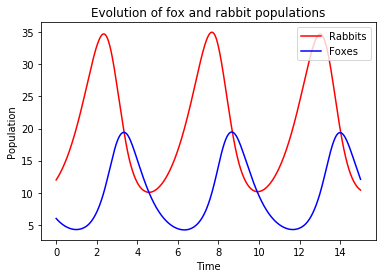

In [2]:
from scipy import integrate


def dy_dt(t, y):
    """Return the growth rate of fox and rabbit populations."""
    a = 1.
    b = 0.1
    c = 1.5
    d = 0.75
    return np.array([a*y[0] - b*y[0]*y[1],
                     -c*y[1] + d*b*y[0]*y[1]])


t = np.linspace(0, 15, 1000)
# Initial conditions: 12 rabbits and 6 foxes
y0 = np.array([12, 6])

# Solve equations given initial conditions
res = integrate.solve_ivp(dy_dt, (0, t.max()), y0, t_eval=t)

# Plot the found solution
rabbits, foxes = res.y
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, rabbits, 'r-', label='Rabbits')
ax.plot(t, foxes, 'b-', label='Foxes')
ax.legend(loc='upper right')
ax.set_xlabel('Time')
ax.set_ylabel('Population')
_ = ax.set_title('Evolution of fox and rabbit populations')

## Global optimizers - they're good now!

In [3]:
from scipy import optimize

In [4]:
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
            - x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

bounds = [(-512, 512), (-512, 512)]

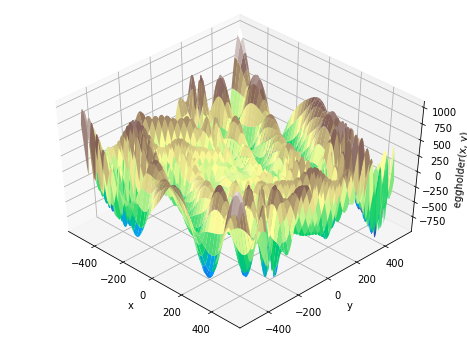

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
_ = ax.set_zlabel('eggholder(x, y)')

In [6]:
results = dict()

In [7]:
results['shgo'] = optimize.shgo(eggholder, bounds)
results['shgo']

     fun: -935.3379515604197
    funl: array([-935.33795156])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 2
   nlfev: 37
   nlhev: 0
   nljev: 9
 success: True
       x: array([439.48096952, 453.97740589])
      xl: array([[439.48096952, 453.97740589]])

In [8]:
results['shgo_sobol'] = optimize.shgo(eggholder, bounds, n=200, iters=5,
                                      sampling_method='sobol')
results['shgo_sobol']

     fun: -959.6406627208496
    funl: array([-959.64066272, -935.33795156, -894.57890039, -894.57890039,
       -888.94912527, -821.19646107, -786.52599408, -786.52599408,
       -738.03782981, -718.16745962, -716.67150034, -716.67150034,
       -716.16462286, -704.80659592, -633.84230224, -629.63368128,
       -582.30628005, -582.30628005, -582.30628005, -565.99778097,
       -559.78685655, -558.5207321 , -557.85777903, -557.36868733,
       -540.42629519, -512.39026451, -507.87385942, -493.9605115 ,
       -469.72292819, -445.047487  , -443.49738405, -443.49738405,
       -426.48799655, -426.48799655, -421.15571437, -420.13950974,
       -419.31194957, -410.98477763, -362.41355122, -343.15559055,
       -306.72046784, -306.06407936, -302.28160328, -301.03271395,
       -293.29583236, -293.29583236, -250.65145465, -211.18048744,
       -206.69740639, -206.57193954, -203.18194707, -158.68816766,
       -126.82917996, -126.42383221, -123.79416261, -122.89314473,
       -111.78879673,  

In [9]:
x0 = [np.random.randint(low=-512, high=512),
      np.random.randint(low=-512, high=512)]
results['DA'] = optimize.dual_annealing(eggholder, x0, bounds)
results['DA']

     fun: -935.3379515576987
 message: ['Maximum number of iteration reached']
    nfev: 4055
    nhev: 0
     nit: 1000
    njev: 0
       x: array([439.48089079, 453.97731303])

In [10]:
results['DE'] = optimize.differential_evolution(eggholder, bounds)
results['DE']

     fun: -894.5789003904961
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 834
     nit: 26
 success: True
       x: array([-465.69412665,  385.71670402])

In [11]:
results['BH'] = optimize.basinhopping(eggholder, bounds)
results['BH']

                        fun: -565.9977809710118
 lowest_optimization_result:       fun: -565.9977809710118
 hess_inv: array([[ 9.73396156, -2.75806702,  0.        ,  0.        ],
       [-2.75806702,  3.74150679,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])
      jac: array([0., 0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([-105.87688797,  423.15323627, -511.83544237,  515.84818205])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 5142
                        nit: 100
                       njev: 857
                          x: array([-105.87688797,  423.15323627, -511.83544237,  515.84818205])

In [12]:
# Minimum from sampling with a fixed grid (so likely close to the real minimum,
# just a little higher)
eggholder(xy).min()

-959.579671903256

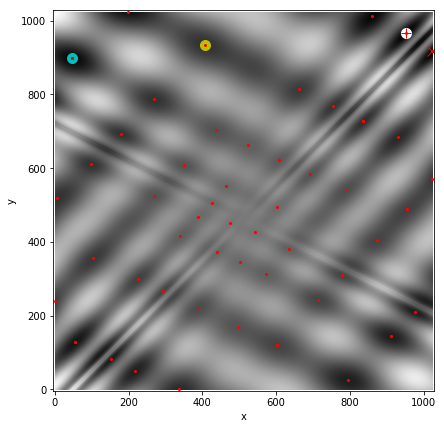

In [13]:
# Plot all the minima we found

fig2 = plt.figure(figsize=(7, 7))
ax = fig2.add_subplot(111)
im = ax.imshow(eggholder(xy), interpolation='bilinear', origin='lower',
               cmap='gray')#, extent=(-3, 3, -2, 2))
ax.set_xlabel('x')
_ = ax.set_ylabel('y')

# Plot all found minima
def plot_point(res, marker='o', color=None):
    ax.plot(512+res.x[0], 512+res.x[1], marker=marker, color=color, ms=10)

plot_point(results['BH'], color='y')  # basinhopping           - yellow
plot_point(results['DE'], color='c')  # differential_evolution - cyan
plot_point(results['DA'], color='w')  # dual_annealing.        - white

# SHGO produces multiple minima
plot_point(results['shgo'], color='r', marker='+')
plot_point(results['shgo_sobol'], color='r', marker='x')
for i in range(results['shgo_sobol'].xl.shape[0]):
    ax.plot(512 + results['shgo_sobol'].xl[i, 0],
            512 + results['shgo_sobol'].xl[i, 1],
            'ro', ms=2)
    
ax.set_xlim([-4, 514*2])
_ = ax.set_ylim([-4, 514*2])

### Benchmark results for global optimizers

Benchmark results that came with the `shgo` and `dual_annealing` pull requests. Those two functions arrived at about the same time, so we haven't compared them against each other yet.

![SHGO performance profile](https://stefan-endres.github.io/images/shgo/Fig12.svg)

And when limited to 1000 function evaluations and 0.4 seconds runtime:

![SHGO performance profile](https://stefan-endres.github.io/images/shgo/Fig13.svg)

![`dual_annealing` benchmarks](https://user-images.githubusercontent.com/17434537/47660476-5f498b00-db97-11e8-8aea-984d90c48a01.png)